## Data exploratory analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [21]:
url = r'https://raw.githubusercontent.com/MSI17819/Berlin_bike_theft_prediction/main/Berlin_bike_thief_file_for_analysis.csv'

df = pd.read_csv(url, sep=',', encoding="utf-8")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22371 entries, 0 to 22370
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Record_date              22371 non-null  object
 1   Record_day               22371 non-null  int64 
 2   Record_month             22371 non-null  int64 
 3   Record_year              22371 non-null  int64 
 4   Stealing_date            22371 non-null  object
 5   Stealing_hour            22371 non-null  int64 
 6   Report_stealing_date     22371 non-null  object
 7   Report_stealing_hour     22371 non-null  int64 
 8   Berlin_code_area         22371 non-null  int64 
 9   Bike_value               22371 non-null  int64 
 10  Unsuccesful_attempt      22371 non-null  object
 11  Bike_type                22371 non-null  object
 12  Crime_type               22371 non-null  object
 13  Crime_reason             22371 non-null  object
 14  Administrative_district  22371 non-nul

In [22]:
df

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2023-01-03,3,1,2023,2023-01-01,16,2023-01-02,9,2400522,700,No,Women,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Nord,Richard-Sorge-Viertel
1,2023-01-03,3,1,2023,2023-01-02,18,2023-01-02,22,4300621,1950,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße
2,2023-01-03,3,1,2023,2023-01-02,9,2023-01-03,9,6100101,449,No,Bike,Theft,Aggravated theft,Steglitz-Zehlendorf,Steglitz,Schloßstraße,Fichtenberg
3,2023-01-03,3,1,2023,2022-12-31,16,2023-01-02,8,2500835,1420,No,Women,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Friedrichshain Ost,Frankfurter Allee Süd FK,Stralauer Kiez
4,2023-01-03,3,1,2023,2023-01-03,12,2023-01-03,14,1400942,5150,No,Men,Theft,Aggravated theft,Mitte,Wedding,Parkviertel,Westliche Müllerstraße
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22366,2022-01-02,2,1,2022,2022-01-01,19,2022-01-02,18,9501940,449,No,Men,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick
22367,2022-01-01,1,1,2022,2022-01-01,20,2022-01-01,20,1300730,150,No,Men,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Drontheimer Straße
22368,2022-01-01,1,1,2022,2022-01-01,4,2022-01-01,8,2100106,190,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz
22369,2022-01-01,1,1,2022,2022-01-01,14,2022-01-01,14,3601142,1000,No,Men,Theft,Theft,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz


#### Creat DataFrame copy for next visualisation and ML analysis steps. Original DataFrame is saved as good practise.

In [23]:
df_copy = df.copy()

#### Display DataFrame copy

In [24]:
df_copy

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2023-01-03,3,1,2023,2023-01-01,16,2023-01-02,9,2400522,700,No,Women,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Nord,Richard-Sorge-Viertel
1,2023-01-03,3,1,2023,2023-01-02,18,2023-01-02,22,4300621,1950,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße
2,2023-01-03,3,1,2023,2023-01-02,9,2023-01-03,9,6100101,449,No,Bike,Theft,Aggravated theft,Steglitz-Zehlendorf,Steglitz,Schloßstraße,Fichtenberg
3,2023-01-03,3,1,2023,2022-12-31,16,2023-01-02,8,2500835,1420,No,Women,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Friedrichshain Ost,Frankfurter Allee Süd FK,Stralauer Kiez
4,2023-01-03,3,1,2023,2023-01-03,12,2023-01-03,14,1400942,5150,No,Men,Theft,Aggravated theft,Mitte,Wedding,Parkviertel,Westliche Müllerstraße
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22366,2022-01-02,2,1,2022,2022-01-01,19,2022-01-02,18,9501940,449,No,Men,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick
22367,2022-01-01,1,1,2022,2022-01-01,20,2022-01-01,20,1300730,150,No,Men,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Drontheimer Straße
22368,2022-01-01,1,1,2022,2022-01-01,4,2022-01-01,8,2100106,190,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz
22369,2022-01-01,1,1,2022,2022-01-01,14,2022-01-01,14,3601142,1000,No,Men,Theft,Theft,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz


#### Change Record_day column for verbal day representation 

In [6]:
df_copy['Record_day'] = pd.to_datetime(df_copy['Record_date']).dt.day_name()

#### Day of week when most thiefs happend

In [7]:
df_copy.groupby('Record_day')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Record_day,
Monday,7068
Tuesday,6482
Wednesday,6459
Thursday,6116
Friday,5557
Sunday,4758
Saturday,4254


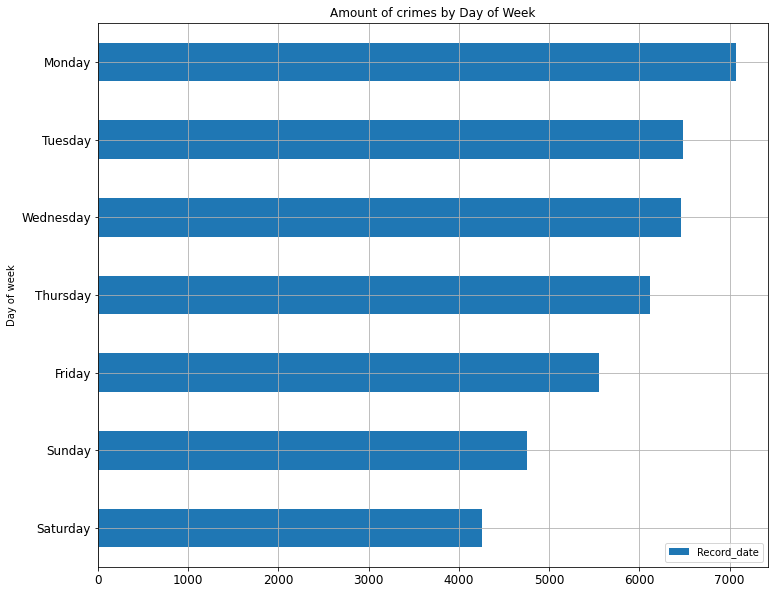

In [8]:
df_copy.groupby('Record_day')[['Record_date']].count()\
                .sort_values(by='Record_date', ascending=True)\
                .plot(kind='barh',
                figsize=(12,10),
                fontsize=12,
                title='Amount of crimes by Day of Week',
                xlabel='Day of week',
                grid=True);

#### Change *Record_month* column for verbal month representation

In [9]:
df_copy['Record_month'] = pd.to_datetime(df_copy['Record_date']).dt.month_name()

#### Month of year when most thiefs happend¶

In [10]:
df_copy.groupby('Record_month')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Record_month,
September,4485
October,4451
August,4435
June,4136
July,3923
May,3833
November,3784
March,3036
April,3013


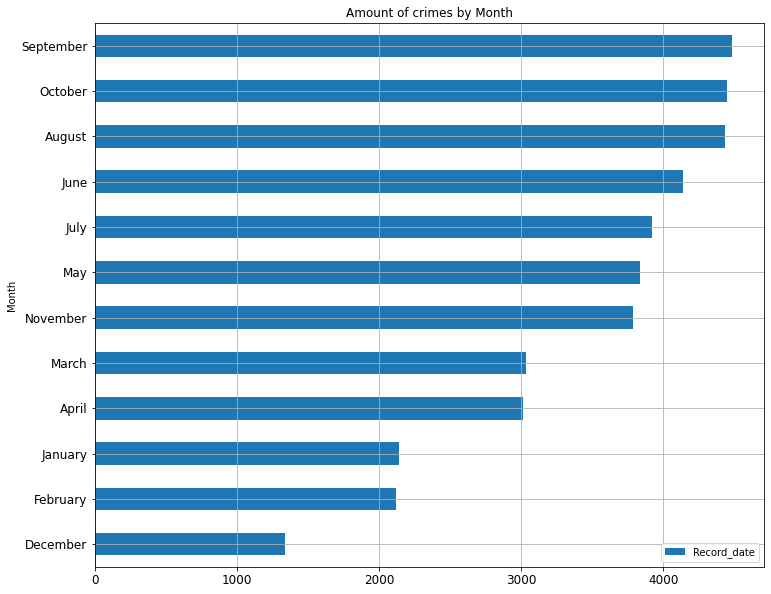

In [11]:
df_copy.groupby('Record_month')[['Record_date']].count()\
                .sort_values(by='Record_date', ascending=True)\
                .plot(kind='barh',
                figsize=(12,10),
                fontsize=12,
                title='Amount of crimes by Month',
                xlabel='Month',
                grid=True);

#### Administrative district with most bike thiefs

In [12]:
df_copy.groupby('Administrative_district')[['Record_date']].count().sort_values(by=['Record_date'], ascending=False)

,Record_date
Administrative_district,
Pankow,6101
Mitte,6082
Friedrichshain-Kreuzberg,5685
Charlottenburg-Wilmersdorf,4285
Tempelhof-Schöneberg,3422
Treptow-Köpenick,3153
Neukölln,3141
Steglitz-Zehlendorf,2563
Lichtenberg,2319


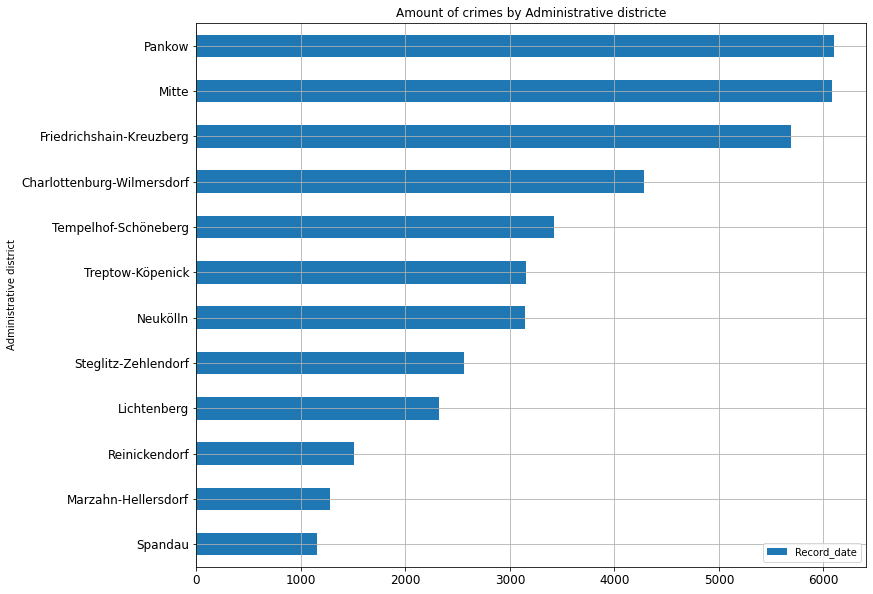

In [13]:
df_copy.groupby('Administrative_district')[['Record_date']].count()\
                                    .sort_values(by=['Record_date'], ascending=True)\
                                    .plot(kind='barh',
                                    figsize=(12,10),
                                    fontsize=12,
                                    title='Amount of crimes by Administrative districte',
                                    xlabel='Administrative district',
                                    grid=True);

#### Most stealing bike type

In [14]:
df_copy.groupby('Bike_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Bike_type,
Men,18851
Women,11582
Bike,6241
Mountain,1782
Child,1585
Racing,578
Cargo,75


In [362]:
df_copy.groupby('Crime_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Crime_type,
Theft,33977
Break-in,1520


### Conclusion after exploratory analysis

###### 1. Most bicycles are stolen in a large district of Berlin and the most populated area​.

Pankow one of the biggest Berlin area 103.01 km2, population 410 716, density 4,000/km2 one of the biggest Berlin district


###### 2. Three another district: *Mitte, Friedrichshain-Kreuzberg and Charlottenburg-Wilmersdorf* are smaller areas, but they have a large peoples population:

- Mitte area 39.47 km2, population 383 360, density 9,700/km2
- Friedrichshain-Kreuzberg area 20.16 km2, population 289 787, density 14,000/km2 
- Charlottenburg-Wilmersdorf area 64.72 km2, population 341 392, density 5,300/km2


###### 3. Three from first five areas are included to Berlin "centrum" area (well connected have most of administration and national offices, restaurants, clubs and service sectore, monuments, museums)


Berlin districts [map link](https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin)


##### 4. Most of stealing cases are happen during a weekday, the amount of thiefs, down-fall on weekend day Saturday and Sunday

Most peoples use bikes at weekend days (bike trip, park ride etc.). Addictionaly probability that peoples are stay at home in Saturday and Sunday is greater than in regular weekdays, so thieves have less time and opportunitys for they action.

##### 5. Most of stealing cases are happend during summer, spring and autumn months.

Spring, summer and autumn are the months when bicycles are most often used, so users often leave them outside (riding to the shop, school, office), making bicycles vulnerable to theft. These months (especially summer) are also usually the months when people go on holiday or spend their free time out of town. Due to these situations, they are away from home for at least 1-2 weeks, making it much easier to commit theft.

### Data preprocessing for ML application

#### Drop column *Record_date*

In [15]:
df.drop(columns=["Record_date"], axis=1, inplace=True)

In [16]:
df

,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,1,12,2022,2022-12-01,8,2022-12-01,8,1300836,506,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest
1,1,12,2022,2022-11-29,22,2022-11-30,17,1300732,718,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße
2,1,12,2022,2022-05-28,7,2022-05-28,14,6300526,569,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
3,1,12,2022,2022-11-21,9,2022-11-21,16,1100309,600,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße
4,1,12,2022,2022-11-30,16,2022-12-01,11,3701659,400,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40689,2,1,2021,2021-01-02,13,2021-01-02,13,8401243,1700,No,Men,Theft,Aggravated theft,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
40690,1,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
40691,1,1,2021,2021-01-01,17,2021-01-01,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel
40692,1,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee


#### Change column type for *datetime* format 

In [17]:
df['Stealing_date'] = pd.to_datetime(df['Stealing_date'])
df['Report_stealing_date'] = pd.to_datetime(df['Report_stealing_date'])

#### Change all column type *object* to DataFrame *category* 

In [18]:
df[[col for col in df.columns if df[col].dtypes == object]] = \
df[[col for col in df.columns if df[col].dtypes == object]].astype('category')

In [19]:
df

,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,1,12,2022,2022-12-01,8,2022-12-01,8,1300836,506,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest
1,1,12,2022,2022-11-29,22,2022-11-30,17,1300732,718,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße
2,1,12,2022,2022-05-28,7,2022-05-28,14,6300526,569,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
3,1,12,2022,2022-11-21,9,2022-11-21,16,1100309,600,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße
4,1,12,2022,2022-11-30,16,2022-12-01,11,3701659,400,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40689,2,1,2021,2021-01-02,13,2021-01-02,13,8401243,1700,No,Men,Theft,Aggravated theft,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
40690,1,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
40691,1,1,2021,2021-01-01,17,2021-01-01,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel
40692,1,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40694 entries, 0 to 40693
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Record_day               40694 non-null  int64         
 1   Record_month             40694 non-null  int64         
 2   Record_year              40694 non-null  int64         
 3   Stealing_date            40694 non-null  datetime64[ns]
 4   Stealing_hour            40694 non-null  int64         
 5   Report_stealing_date     40694 non-null  datetime64[ns]
 6   Report_stealing_hour     40694 non-null  int64         
 7   Berlin_code_area         40694 non-null  int64         
 8   Bike_value               40694 non-null  int64         
 9   Unsuccesful_attempt      40694 non-null  category      
 10  Bike_type                40694 non-null  category      
 11  Crime_type               40694 non-null  category      
 12  Crime_reason             40694 n

## Machine Learning prediction modeling

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

#### Split data to 60% train and 40% test (the size of dataset is big almost 33 thousand)

In [23]:
X = df.drop(['Unsuccesful_attempt'], axis=1)
y = df['Unsuccesful_attempt']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,
                                                   random_state = 42)

#### Transform y-variable by LabelEncoder for two classes (0 and 1)

Project assume crime prediction, but in dataset more than 99% are crime, and only 1% are no crime (*Unsucessfuly_attempt* column). Due to this fact, y-variable are reverse encoding. No crime treat as 0 (normal situation), crime treat as 1 (unnormal situation) 


- Crime unhappend *(Unsucessfuly attempt == Yes)* = label with number 0 
- Crime happend *(Unsucessfuly attempt == No)* = label with number 1 

In [26]:
le = preprocessing.LabelEncoder()

y_train = 1 - le.fit_transform(y_train)

y_test = 1 - le.transform(y_test)

In [27]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

#### Checking correct reverse coding for y_train data

In [28]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 70, 1: 21228}

### Preprocessing data for ML algoritm

#### Create pipline for all data transformation

##### Pipline steps:
- data transformation (*OneHotEncoding*, *StandardScaler*)

    *OneHotEncoding* for category data and column with datetime format
 
    *StandardScaler* for *Price* column


- data oversampling (*SMOTE technique*)

    *SMOTE* (Synthetic Minority Oversampling Technique) application for minority class. According to literature SMOTE is better then ordinar oversampling method, because algoritm create new data with information, contray to ordinar oversampling create only new data by duplicated them without information component.
    
    SMOTE technique is applied only for train dataset, which prevent data leakage between train and test datasets.


- algorithms applying (Bernoulli Naive Bayes, Logistic Regresion, Decison Tree, Support Vector Machines, Gradient Boosting, Random Forest)

    For all algorithms scores are expressed by *roc_auc_score* and results are reported by *predic_proba* method (class 1 probabilities)

### Preprocesor pipline buliding

#### Fit and transform method for X_train, and fit method for X_test data set by data preprocessor

In [29]:
ohe_transform_col = ['Record_day','Record_month', 'Record_year', 'Stealing_hour',
                     'Report_stealing_hour', 'Berlin_code_area', 'Bike_type',
                     'Crime_type','Crime_reason','Administrative_district', 'District', 'Quarter', 'Street_name']

ohe_transformer = Pipeline(steps = [
    ('ohe_transform', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

sc_transform_col = ['Bike_value']

sc_transformer = Pipeline(steps = [
    ('sc_transform', StandardScaler())   
])


preprocessor = ColumnTransformer(transformers = [
    ('tnf1', ohe_transformer, ohe_transform_col),
    ('tnf2', sc_transformer, sc_transform_col),
])


preproces_pipe = Pipeline(steps = [
                        ('preprocessor', preprocessor)
])

X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

#### Oversampling method

Dataset is highly unbalanced:

35 378 record are crime (Unsuccesful_attempt" == No, so crime happend) - label 1

119 record are not crime (Unsuccesful_attempt" == Yes, so crime unhappend) - label 0

In [30]:
df["Unsuccesful_attempt"].value_counts()

No     35378
Yes      119
Name: Unsuccesful_attempt, dtype: int64

#### Classes 0 and 1 displayed *befor* the SMOTE technique, and checked for unequal representation in the dataset

In [ ]:
unique, counts = np.unique(y_train_smote, return_counts=True)

dict(zip(unique, counts))

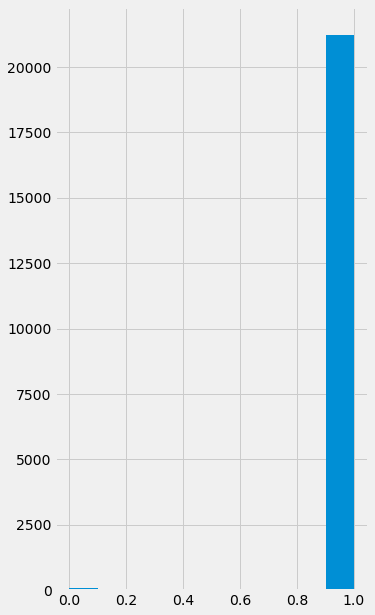

In [31]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(5, 10))
plt.hist(y_train)
plt.show()

In [33]:
oversampling = SMOTE(sampling_strategy='minority', random_state=42)

In [34]:
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train)

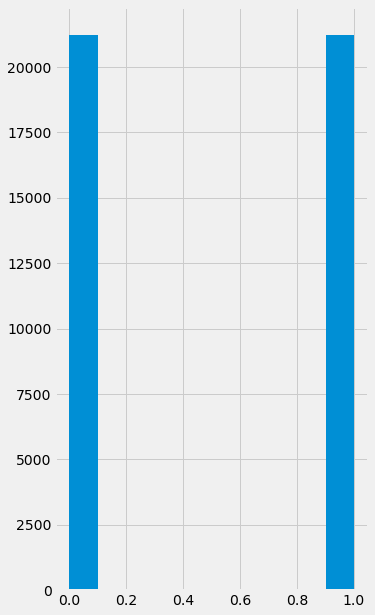

In [36]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(5, 10))
plt.hist(y_train_smote)
plt.show()

#### Classes 0 and 1 displayed *after* the SMOTE technique, and checked for equal representation in the dataset

In [38]:
unique, counts = np.unique(y_train_smote, return_counts=True)

dict(zip(unique, counts))

{0: 21228, 1: 21228}

#### Assembly all classifiers in one pipline

In [55]:
classifiers = [
    BernoulliNB(),
    LogisticRegression(max_iter=500, random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

In [56]:
Models_df = pd.DataFrame()

pipe = Pipeline(steps = [
    ('classifier', None)
])

for model in classifiers:
    pipe_params = {
                'classifier': model
    }
    
    pipe.set_params(**pipe_params)
    
    start_time = time.time()
    pipe.fit(X_train_smote, y_train_smote)
    end_time = time.time()
    
    y_pred = pipe.predict_proba(X_test)
    
    score = roc_auc_score(y_test, y_pred[:,1])
    
    param_dict = {
        'model': model.__class__.__name__,
        'Test score': score,
        'Test time elapsed': end_time - start_time
    }
    
    Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
    
Models_df.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3254732541.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3254732541.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3254732541.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3254732541.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [58]:
Models_df.sort_values('Test score', ascending=False)

,model,Test score,Test time elapsed
5,RandomForestClassifier,0.999553,31.556186
1,LogisticRegression,0.979596,4.756341
4,GradientBoostingClassifier,0.979101,336.863788
3,SVC,0.969831,276.436782
2,DecisionTreeClassifier,0.805451,8.712497
0,BernoulliNB,0.656682,0.491224


#### *Score* boxplot for all models

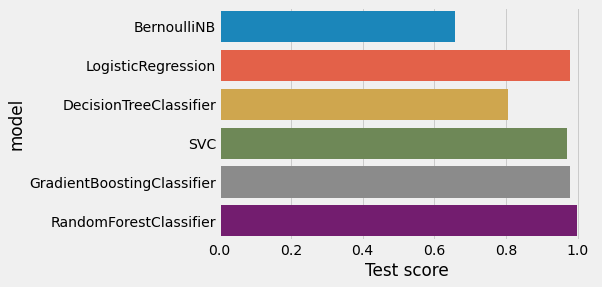

In [59]:
sns.barplot(data=Models_df, x='Test score', y='model');

#### *Time* boxplot for all models

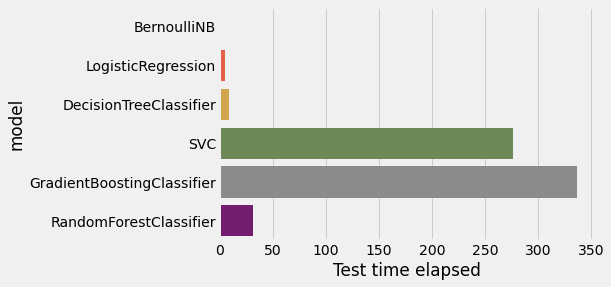

In [60]:
sns.barplot(data=Models_df, x='Test time elapsed', y='model');

#### Assembly of all classifiers in one line only for the X_train and y_train parts of the data

In [61]:
Models_train_df = pd.DataFrame()

pipe_train = Pipeline(steps = [
    ('classifier', None)
])

for model in classifiers:
    pipe_params = {
                'classifier': model
    }
    
    pipe_train.set_params(**pipe_params)
    
    start_time = time.time()
    pipe_train.fit(X_train_smote, y_train_smote)
    end_time = time.time()
 
    y_pred = pipe_train.predict_proba(X_train_smote)
    
    score = roc_auc_score(y_train_smote, y_pred[:,1])
 
    param_dict = {
        'model': model.__class__.__name__,
        'Train score': score,
        'Train time elapsed': end_time - start_time
    }
    
    Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
    
Models_train_df.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3964308235.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3964308235.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3964308235.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/3964308235.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [62]:
Models_train_df.sort_values('Train score', ascending=False)

,model,Train score,Train time elapsed
2,DecisionTreeClassifier,1.000000,8.723783
3,SVC,1.000000,285.448461
5,RandomForestClassifier,1.000000,32.851493
4,GradientBoostingClassifier,1.000000,347.074744
1,LogisticRegression,0.999724,4.430020
0,BernoulliNB,0.999488,0.500884


#### Join two DataFrame with each model results

In [64]:
Models_df_all = Models_df.join(Models_train_df.set_index('model'), how='left', on='model')

#### Comparison each model base on prediction train and test data for investigate which model is underfitting/overfitting

In [65]:
Models_df_all

,model,Test score,Test time elapsed,Train score,Train time elapsed
0,BernoulliNB,0.656682,0.491224,0.999488,0.500884
1,LogisticRegression,0.979596,4.756341,0.999724,4.430020
2,DecisionTreeClassifier,0.805451,8.712497,1.000000,8.723783
3,SVC,0.969831,276.436782,1.000000,285.448461
4,GradientBoostingClassifier,0.979101,336.863788,1.000000,347.074744
5,RandomForestClassifier,0.999553,31.556186,1.000000,32.851493


### Tuning of hyperparameters for the Decision Tree

In [40]:
clf = DecisionTreeClassifier(random_state=42)

In [42]:
pipe_gv = Pipeline(steps = [('classifier', clf)
])

In [46]:
params_dt = {}
params_dt['classifier__max_depth'] = [2, 5, 10, 15]
params_dt['classifier__min_samples_split'] = [2, 5, 10]
params_dt['classifier__min_samples_leaf'] = [2, 5, 10]
params_dt['classifier__max_leaf_nodes'] = [2, 5, 10, 20]
params_dt['classifier'] = [clf]

In [47]:
params = [params_dt]

In [48]:
grid = GridSearchCV(pipe_gv, params, cv=10, verbose=1)
grid.fit(X_train_smote, y_train_smote)
grid.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


{'classifier': DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, min_samples_leaf=2,
                        random_state=42),
 'classifier__max_depth': 2,
 'classifier__max_leaf_nodes': 2,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 2}

In [49]:
classifiers_hiper = [
    BernoulliNB(),
    LogisticRegression(max_iter=500, random_state=42),
    DecisionTreeClassifier(random_state=42, max_depth=2,
                           max_leaf_nodes=2,
                           min_samples_leaf=2,
                           min_samples_split=2),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

In [50]:
Models_hiper_params = pd.DataFrame()

pipe_hiper_params = Pipeline(steps = [
    ('classifiers_hiper', None)
])

for model in classifiers_hiper:
    pipe_hiper_params_params = {
                'classifiers_hiper': model
    }
    
    pipe_hiper_params.set_params(**pipe_hiper_params_params)
    
    start_time = time.time()
    pipe_hiper_params.fit(X_train_smote, y_train_smote)
    end_time = time.time()
    
    y_pred = pipe_hiper_params.predict_proba(X_test)
    
    score = roc_auc_score(y_test, y_pred[:,1])
    
    param_dict = {
        'model': model.__class__.__name__,
        'Test score': score,
        'Test time elapsed': end_time - start_time
    }
    
    Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
    
Models_hiper_params.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_9728/1501813761.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/1501813761.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/1501813761.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_9728/1501813761.py:28: FutureWarning: The frame.append method is deprecated and will be removed 

In [51]:
Models_hiper_params.sort_values('Test score', ascending=False)

,model,Test score,Test time elapsed
5,RandomForestClassifier,0.999553,32.920210
2,DecisionTreeClassifier,0.998975,2.225422
1,LogisticRegression,0.979596,4.266603
4,GradientBoostingClassifier,0.979101,331.971847
3,SVC,0.969831,264.451984
0,BernoulliNB,0.656682,0.504772


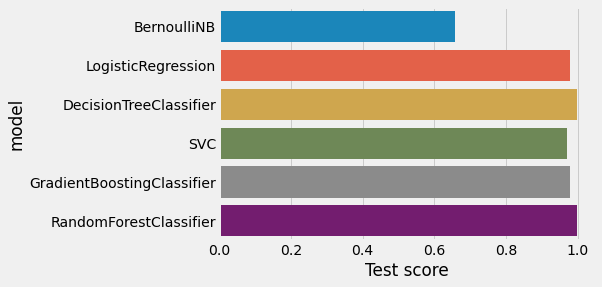

In [52]:
sns.barplot(data=Models_hiper_params, x='Test score', y='model');

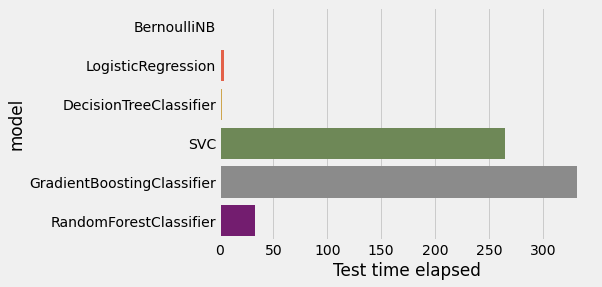

In [53]:
sns.barplot(data=Models_hiper_params, x='Test time elapsed', y='model');

### Conclusion after ML algorithm evaluation


##### 1. Most of algorithm make prediction probability for class 1 (crime happend) above 97%. Very good algorithm result (above 97%) could be caused by SMOTE technique multiplication train dataset for balance purpose (more regularisation methods should be considered for each algorithm)


##### 2. Only BernoulliNB and Decission Tree algorithm first time run archived, a probability prediction at 65% and 81% level.


##### 3. Result for Decission Tree after hiperparameter tunning rise up to 99% level.


##### 4. Considering the time for each algorithm, the best score-to-time ratio was presented by LogisticRegresion and the Decision Tree, while RandomForest also performed quite well.


The main purpose of this project was to learn and practice writing code in Python, and link code with sklearn pipelines and grid searches, and to have a imperfect working classifier which we can link to availability data. 
In my humble opinion, I learned a lot of useful, and practical things.